<a href="https://colab.research.google.com/github/Harshi-63/AI-Lab/blob/main/Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

UCS: Minimum cost from A to D is 6, path: ['A', 'B', 'C', 'D']
BFS: Path from A to D is ['A', 'B', 'D']


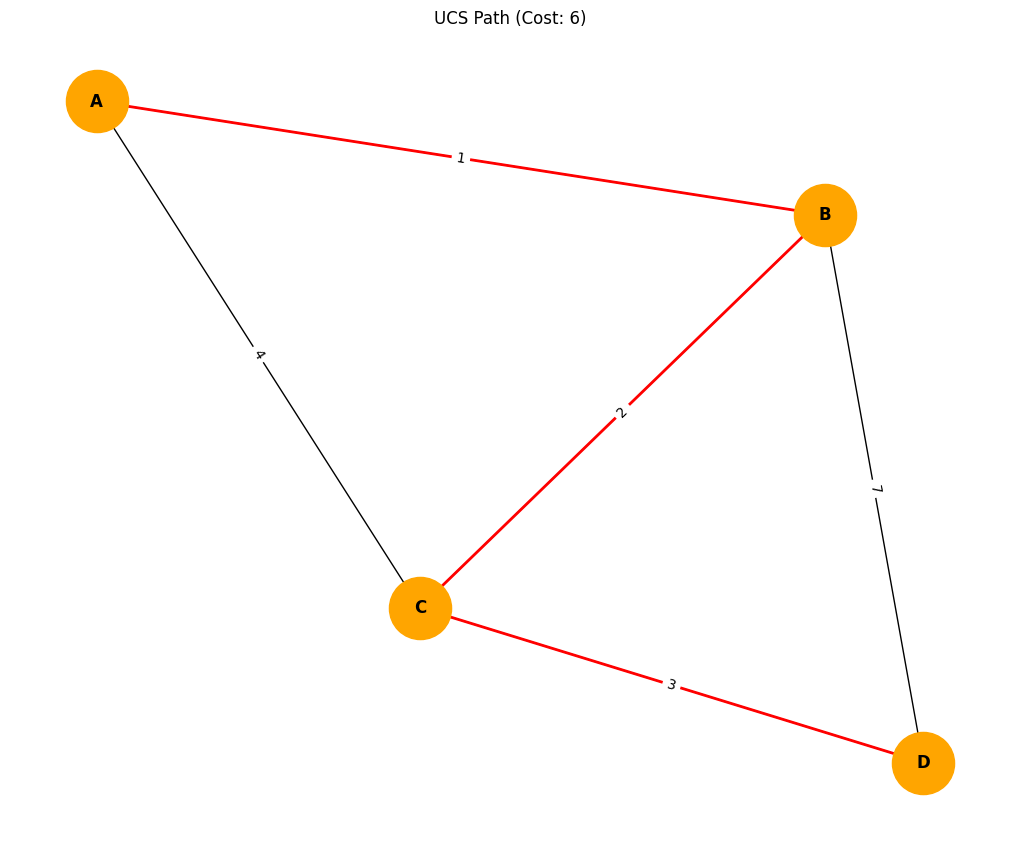

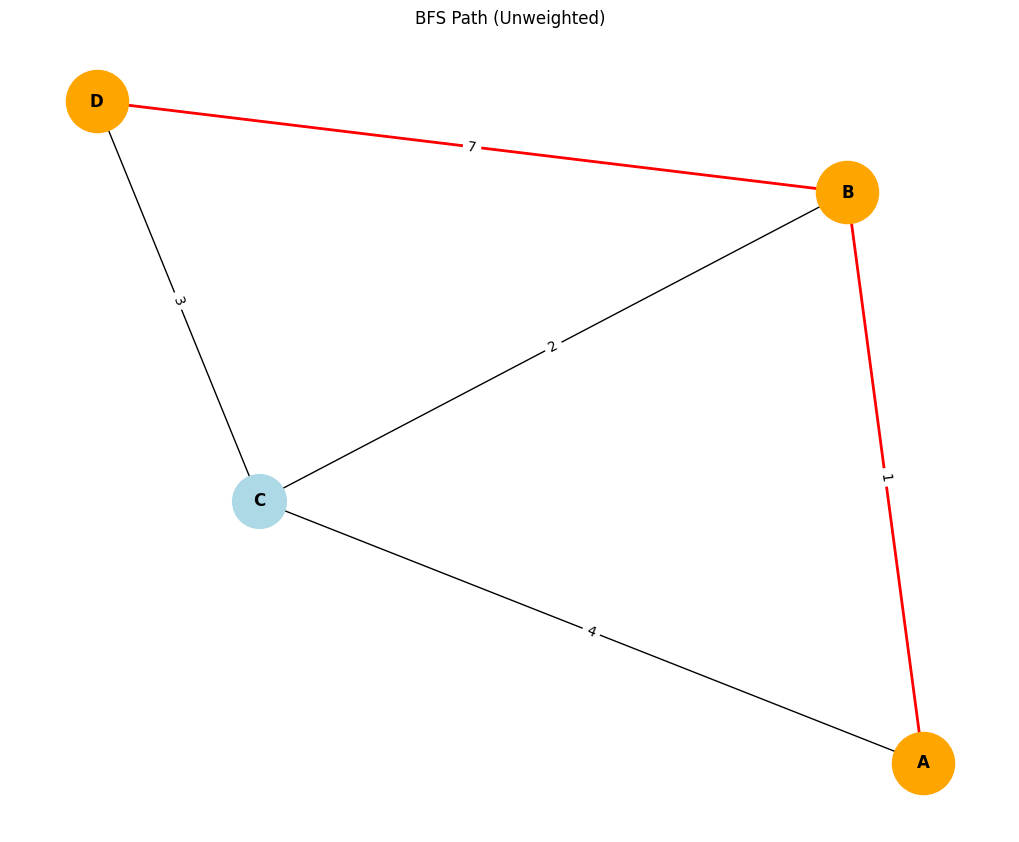

In [1]:
import heapq
from collections import deque
import networkx as nx
import matplotlib.pyplot as plt

# Function to implement Uniform Cost Search
def uniform_cost_search(graph, start, goal):
    priority_queue = [(0, start, [start])]  # (cost, current_node, path)
    visited = set()

    while priority_queue:
        cost, current_node, path = heapq.heappop(priority_queue)

        if current_node in visited:
            continue
        visited.add(current_node)

        if current_node == goal:
            return cost, path

        for neighbor, weight in graph.get(current_node, []):
            if neighbor not in visited:
                heapq.heappush(priority_queue, (cost + weight, neighbor, path + [neighbor]))

    return float('inf'), []

# Function to implement BFS (for unweighted graph)
def bfs_unweighted(graph, start, goal):
    queue = deque([(start, [start])])
    visited = set()

    while queue:
        current_node, path = queue.popleft()

        if current_node in visited:
            continue
        visited.add(current_node)

        if current_node == goal:
            return path

        for neighbor, _ in graph.get(current_node, []):
            if neighbor not in visited:
                queue.append((neighbor, path + [neighbor]))

    return []

# Visualization function
def visualize_graph(graph, path, title):
    G = nx.Graph()

    # Add edges to the graph
    for node, neighbors in graph.items():
        for neighbor, weight in neighbors:
            G.add_edge(node, neighbor, weight=weight)

    pos = nx.spring_layout(G)  # Position nodes for visualization

    # Draw the graph
    plt.figure(figsize=(10, 8))
    nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=1500, font_size=12, font_weight="bold")

    # Highlight edges and nodes in the path
    if path:
        edges_in_path = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
        nx.draw_networkx_edges(G, pos, edgelist=edges_in_path, edge_color="red", width=2)
        nx.draw_networkx_nodes(G, pos, nodelist=path, node_color="orange", node_size=2000)

    # Add edge labels (weights)
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    plt.title(title)
    plt.show()

# Example graph
graph = {
    'A': [('B', 1), ('C', 4)],
    'B': [('A', 1), ('C', 2), ('D', 7)],
    'C': [('A', 4), ('B', 2), ('D', 3)],
    'D': [('B', 7), ('C', 3)]
}

# UCS
start, goal = 'A', 'D'
ucs_cost, ucs_path = uniform_cost_search(graph, start, goal)
print(f"UCS: Minimum cost from {start} to {goal} is {ucs_cost}, path: {ucs_path}")

# BFS
bfs_path = bfs_unweighted(graph, start, goal)
print(f"BFS: Path from {start} to {goal} is {bfs_path}")

# Visualize UCS
visualize_graph(graph, ucs_path, title=f"UCS Path (Cost: {ucs_cost})")

# Visualize BFS
visualize_graph(graph, bfs_path, title="BFS Path (Unweighted)")
